In [18]:
pip install opencv-python

   ---------------------------------------- 0.0/39.5 MB ? eta -:--:--
   --------- ------------------------------ 9.2/39.5 MB 51.8 MB/s eta 0:00:01
   ----------- ---------------------------- 11.8/39.5 MB 30.8 MB/s eta 0:00:01
   -------------- ------------------------- 14.4/39.5 MB 23.8 MB/s eta 0:00:02
   --------------- ------------------------ 14.9/39.5 MB 20.0 MB/s eta 0:00:02
   --------------- ------------------------ 15.7/39.5 MB 15.7 MB/s eta 0:00:02
   ---------------- ----------------------- 16.8/39.5 MB 13.4 MB/s eta 0:00:02
   ------------------ --------------------- 17.8/39.5 MB 12.2 MB/s eta 0:00:02
   ------------------- -------------------- 19.1/39.5 MB 11.4 MB/s eta 0:00:02
   -------------------- ------------------- 20.7/39.5 MB 10.9 MB/s eta 0:00:02
   ---------------------- ----------------- 22.3/39.5 MB 10.5 MB/s eta 0:00:02
   ------------------------ --------------- 24.1/39.5 MB 10.4 MB/s eta 0:00:02
   -------------------------- ------------- 26.0/39.5 MB 10.3 

In [55]:
!pip install --upgrade numpy


   ---------------------------------------- 0.0/12.7 MB ? eta -:--:--
   --------------------------- ------------ 8.7/12.7 MB 48.8 MB/s eta 0:00:01
   ------------------------------------- -- 12.1/12.7 MB 31.5 MB/s eta 0:00:01
   ---------------------------------------- 12.7/12.7 MB 25.7 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
contourpy 1.2.0 requires numpy<2.0,>=1.20, but you have numpy 2.3.1 which is incompatible.
gensim 4.3.3 requires numpy<2.0,>=1.18.5, but you have numpy 2.3.1 which is incompatible.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.3.1 which is incompatible.
scipy 1.13.1 requires numpy<2.3,>=1.22.4, but you have numpy 2.3.1 which is incompatible.
tensorflow 2.19.0 requires numpy<2.2.0,>=1.26.0, but you have numpy 2.3.1 which is incompatible.


Importing

In [2]:
import numpy as np
import pandas as pd
import keras
import cv2
from matplotlib import pyplot as plt
import tensorflow as tf
import os
import random
from PIL import Image

In [3]:
df = pd.read_csv("train.csv")
base_path = "./images/"

In [4]:
df

,id,landmark_id
0,17660ef415d37059,1
1,92b6290d571448f6,1
2,cd41bf948edc0340,1
3,fb09f1e98c6d2f70,1
4,25c9dfc7ea69838d,7
...,...,...
1580465,72c3b1c367e3d559,203092
1580466,7a6a2d9ea92684a6,203092
1580467,9401fad4c497e1f9,203092
1580468,aacc960c9a228b5f,203092


In [ ]:
samples = 20000

#df =  df.iloc[ : samples, :  ] 

df = df.loc[df["id"].str.startswith('00', na = False),:]
num_classes = len(df["landmark_id"].unique())
num_data = len(df)

In [6]:
num_classes

5346

In [7]:
num_data

6120

In [8]:
data = pd.DataFrame(df["landmark_id"].value_counts())
data.reset_index(inplace=True)
data.head()

,landmark_id,count
0,138982,31
1,83144,14
2,126637,7
3,194914,7
4,109169,6


In [9]:
data.tail()

,landmark_id,count
5341,71434,1
5342,71336,1
5343,71228,1
5344,71145,1
5345,202981,1


In [10]:
data.columns = ['landmark_id', 'count']

In [11]:
data['count'].describe()

count    5346.000000
mean        1.144781
std         0.641260
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max        31.000000
Name: count, dtype: float64

(array([5.344e+03, 1.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+0

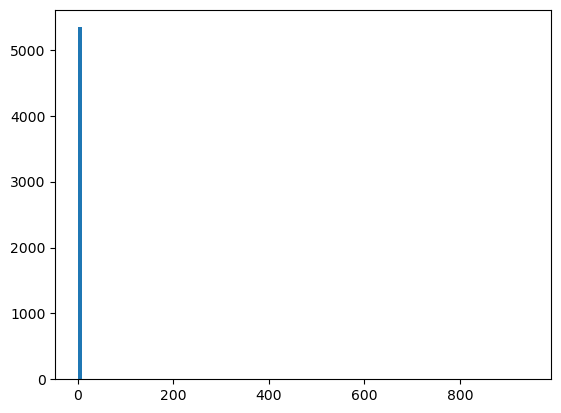

In [12]:
plt.hist(data['count'], 100, range = (0,944), label = 'test')

In [13]:
data['count'].between(0,5).sum()

5339

In [14]:
data['count'].between(5,10).sum()

14

(array([2., 1., 1., ..., 1., 1., 2.]),
 array([2.70000e+01, 6.00000e+01, 1.24000e+02, ..., 2.02950e+05,
        2.02972e+05, 2.02981e+05]),
 <BarContainer object of 5345 artists>)

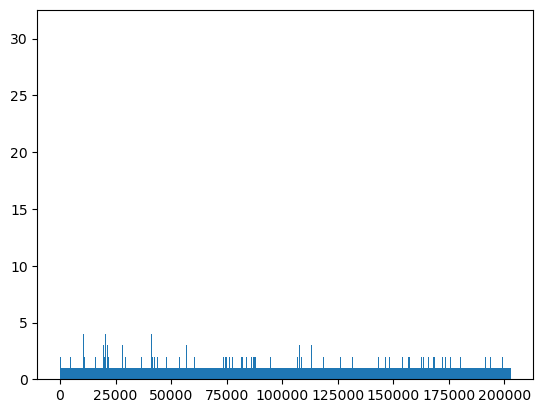

In [15]:
plt.hist(df["landmark_id"], bins = df["landmark_id"].unique())

Training of Model

In [ ]:
from sklearn.preprocessing import LabelEncoder

lencoder = LabelEncoder()
lencoder.fit(df["landmark_id"])

LabelEncoder()

In [17]:
df.head()

,id,landmark_id
119,00cba0067c078490,27
120,00f928e383e1d121,27
796,009ecdb56b5e9adb,60
1089,00d5d47528839144,124
1133,00e9003a381ab809,134


Encoding

In [18]:
def encode_label(lbl):
    return lencoder.transform(lbl)

Decoding

In [19]:
def decode_label(lbl):
    return lencoder.inverse_transform(lbl)

In [20]:
def get_image_from_number(num, df):
    fname, label = df.iloc[num, :]
    fname = fname + '.jpg'
    f1 = fname[0]
    f2 = fname[1]
    f3 = fname[2]
    path = os.path.join(f1,f2,f3,fname)
    im = cv2.imread(os.path.join(base_path, path))
    return im, label

4 Sample images from random classes


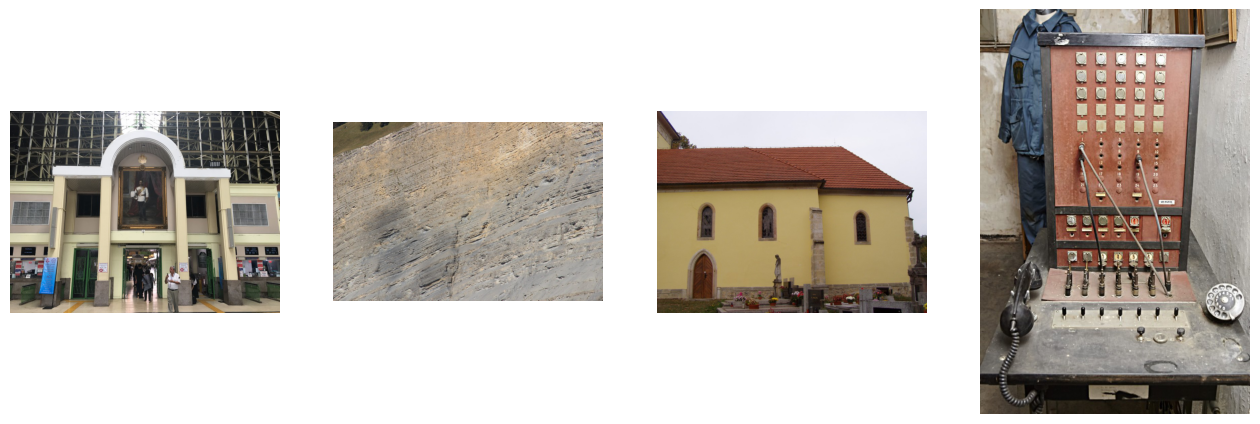

In [21]:
print("4 Sample images from random classes")
fig = plt.figure(figsize=(16,16))
for i in range(1,5):
    ri = random.choices(os.listdir(base_path), k=3)
    folder = base_path + '/' + ri[0] + '/' + ri[1] + '/' + ri[2]
    random_img = random.choice(os.listdir(folder))
    img = np.array(Image.open(folder+'/'+random_img))
    fig.add_subplot(1,4,i)
    plt.imshow(img)
    plt.axis('off')
plt.show()             

In [22]:
from keras.applications.vgg19 import VGG19
from keras.layers import *
from keras import Sequential
tf.compat.v1.enable_eager_execution()

In [23]:
#parameters
learning_rate = 0.0001
decay_speed = 1e-6
momentum = 0.09
loss_function = "sparse_categorical_crossentropy"
source_model = VGG19(weights = None)
drop_layer = Dropout(0.5)
drop_layer2 = Dropout(0.5)

Model

In [24]:
model = Sequential()
for layer in source_model.layers[:-1]:
    if layer == source_model.layers[-25]:
        model.add(BatchNormalization())
    model.add(layer)
model.add(Dense(num_classes, activation = 'softmax'))
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ batch_normalization                  │ (None, 224, 224, 3)         │              12 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv1 (Conv2D)                │ (None, 224, 224, 64)        │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_conv2 (Conv2D)                │ (None, 224, 224, 64)        │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block1_pool (MaxPooling2D)           │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv1 (Conv2D)                │ (None, 112, 112, 128)       │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_conv2 (Conv2D)                │ (None, 112, 112, 128)       │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block2_pool (MaxPooling2D)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv1 (Conv2D)                │ (None, 56, 56, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv2 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv3 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_conv4 (Conv2D)                │ (None, 56, 56, 256)         │         590,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block3_pool (MaxPooling2D)           │ (None, 28, 28, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv1 (Conv2D)                │ (None, 28, 28, 512)         │       1,180,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv2 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv3 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_conv4 (Conv2D)                │ (None, 28, 28, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block4_pool (MaxPooling2D)           │ (None, 14, 14, 512)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv1 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv2 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv3 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ block5_conv4 (Conv2D)                │ (None, 14, 14, 512)         │       2,359,8

 Total params: 161,472,814 (615.97 MB)

 Trainable params: 161,472,808 (615.97 MB)

 Non-trainable params: 6 (24.00 B)

In [ ]:
from tensorflow.keras.optimizers import RMSprop

optim1 = RMSprop(learning_rate=learning_rate)

model.compile(
    optimizer=optim1,
    loss=loss_function,
    metrics=["accuracy"]
)

In [26]:
def image_reshape(im, target_size):
    return cv2.resize(im, target_size)

In [ ]:
def get_batch(dataframe, start, batch_size):
    image_array = []
    label_array = []
    
    end_img = start+batch_size
    if (end_img) > len(dataframe):
        end_img = len(dataframe)
        
    for idx in range(start, end_img):
        n = idx
        im, label = get_image_from_number(n, dataframe)
        im = image_reshape(im, (224, 224)) / 255.0
        image_array.append(im)
        label_array.append(label)
    label_array = encode_label(label_array)
    
    return np.array(image_array),  np.array(label_array)

Split

In [ ]:
train, val = np.split(
    df.sample(frac=1),
    [int(0.8 * len(df))]
)

print(len(train))    
print(len(val))   

4896
1224


C:\Users\samuj\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:59: FutureWarning: 'DataFrame.swapaxes' is deprecated and will be removed in a future version. Please use 'DataFrame.transpose' instead.
  return bound(*args, **kwds)


In [ ]:
batch_size = 16
epoch_shuffle = True
weight_classes = True
epochs = 1

In [ ]:
for e in range(epochs):
    print("Epoch : " + str (e+1) + "/"+ str(epochs))
    if epoch_shuffle:
        train = train.sample(frac = 1)
    for it in range(int(np.ceil(len(train)/batch_size))):
        x_train, y_train = get_batch(train, it*batch_size, batch_size)
        
        model.train_on_batch(x_train, y_train)
        
model.save("Model.h5")

Epoch : 1/1


In [ ]:
batch_size = 16

errors = 0
good_preds = []
bad_preds = []

for it in range(int(np.ceil(len(val)/batch_size))):
    x_val, y_val = get_batch(val, it*batch_size, batch_size)
    
    result = model.predict(x_val)
    cal=np.argmax(result,axis=1)
    
    for idx, res in enumerate(result):
        if cal[idx] != y_val[idx]:
            errors = errors + 1
            bad_preds.append([batch_size*it + idx, cal[idx], res[cal[idx]]])
        else:
            good_preds.append([batch_size*it + idx, cal[idx], res[cal[idx]]])

1/1 ━━━━━━━━━━━━━━━━━━━━ 12s 12s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 12s 12s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 12s 12s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 12s 12s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 10s 10s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 11s 11s/step
1/1 ━━━━━━━━

In [74]:
good_preds = np.array(good_preds)
good_preds = np.array(sorted(good_preds, key = lambda X : X[2], reverse = True))

In [68]:
good_preds.size

12

In [76]:
good_preds.shape

(4, 3)

In [70]:
len(good_preds)

4

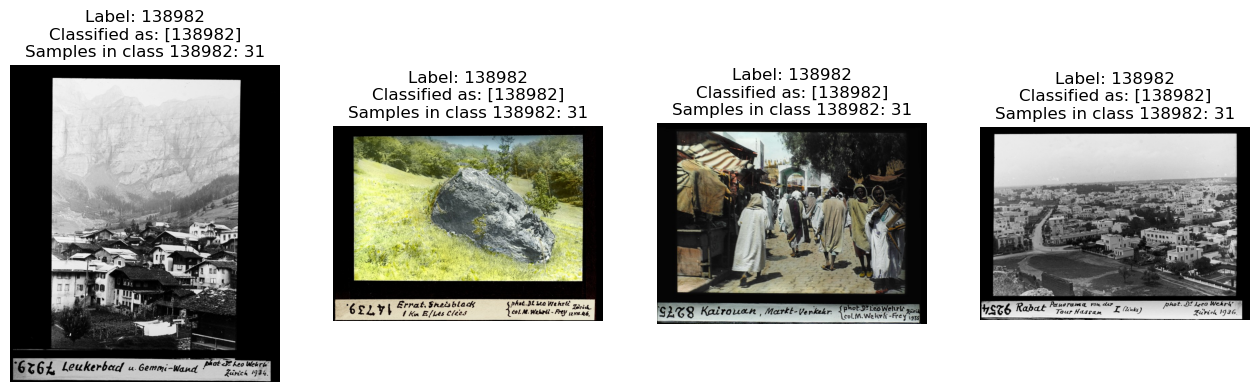

In [ ]:
fig = plt.figure(figsize=(16, 16))
for i in range(len(good_preds)):
    n = int(good_preds[i, 0])
    img, lbl = get_image_from_number(n, val)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    fig.add_subplot(1, len(good_preds), i + 1)
    plt.imshow(img)
    
    lbl2 = np.array([int(good_preds[i, 1])])  
    sample_cnt = list(df.landmark_id).count(lbl)
    
    plt.title(
        f"Label: {lbl}\n"
        f"Classified as: {decode_label(lbl2)}\n"
        f"Samples in class {lbl}: {sample_cnt}"
    )
    
    plt.axis('off')
    
plt.show()
